# Integration in Python
Python has a entire library devoted to algorthims implementing the integration techniques that we talked about today. You just need to import *scipy.integrate*

In [4]:
import scipy.integrate as sci
sci?

The second line will list how the contents and summary of the functions within the module *scipy.integrate*. Also note that I have included my own integration algorithms (**user beware**) in myint.py on the *github* repository *GradCompPhys*

The next thing to do is figure out how to use these functions. My functions all accept a *lambda* function, limits, and number of evaluation points. The built-in functions are also coded to take either arrays or *lambda* functions (depending on the function) and arrays of where the y values are evaluated or limits. Below are some examples using the trapezoid rule, Simpson's rule and Romberg integration.

In [21]:
import myint
import numpy as np
x = np.linspace(1,8,100)
ftrap = lambda x: x**3/(np.exp(x)-1)
farray = ftrap(x)
t =myint.trapezoidrule(ftrap,1,8,100)
p = sci.trapz(farray,x)
print(t)
print(p)

6.01443771737
6.01442998299


In [23]:
t=myint.simpsonrule(ftrap,1,8,100)
p = sci.simps(farray,x)
print(t)
print(p)

6.01481875767
6.01481846876


In [27]:
t=myint.rombergrule(ftrap,1,8)
p = sci.romberg(ftrap,1,8)
print(t)
print(p)

6.01481686344
6.01481860687


Python also has builtin functions to deal with double and triple integrals. Below are examples of double and triple integrals using *dblquad* and *tplquad*

Many times in electrostatics and magnetostatics, we need to integrate using non constant limits of integration; use lambda functions to accomplish this in Python

In [36]:
f2 = lambda x, y: x**2+y
sci.dblquad(f2,0,3, lambda x: 0, lambda x: 1-2*x)

(-39.5, 6.247250486690459e-13)

In [42]:
f3 = lambda x, y,z: x**2*y+3*z
sci.tplquad(f3,0,2,lambda x: 0, lambda x: 3-x, lambda x,y:1,lambda x,y: 4-x-y)

(18.38888888888889, 2.0415767841718157e-13)

###### Challenge Problem 1.1 (From *Computational Physics* Newman)
The simple harmonic oscillator crops up in many places. Its behaviors can be studied readily using analytic methods and it has the important property that its period of oscillation is constant, independent of its amplitude, making it useful, for instance, for keeping time in watches and clocks. 
Frequently in physics, however, we also come across anharmonic oscillators, whose period varies with amplitude and whose behavior cannot usually be calculated analytically. A general classical oscillator can be thought of as a particle in a concave potential well. When disturbed, the particle will rock back and forth in the well. The harmonic oscillator corresponds to a quadratic potential $V(x)\alpha x^2$. Any other form gives an anharmonic oscillator.
One way to calculate the motion of an oscillator is to write down the equation for the conservation of enregy in the system. If the particle has a mass *m* and position *x*, then the total energy is equal to the sum of the kinetic and potential energies thus: $$E = \frac{1}{2}m\left(\frac{dx}{dt}\right)^2 + V(x).$$ Since the energy must be constant over time, this equation is effectively a differential equation linking *x* and *t*. 
Let us assume that the potential $V(x)$ is symmetric about $x=0$ and let us set our anharmonic oscillator going with amplitude *a* and it swings back towards the origin. Then at $t=0$ we have $dx/dt=0$.

(a) Convince yourself that the period of this oscillator is $$T = \int_{0}^{a} \frac{dx}{\sqrt{V(a)-V(x)}}$$.

(b) Write a program in Python and MATLAB that takes the amplitude *a* as an argument and calculates the period of an anharmonic ocsillator with a mass $m=1$ and potential $V(x)=x^4$. Experiment with different integral functions.

(c) Use your function to make a graph of the period for amplitudes ranging from $a=0$ to $a=4$. Do the results match your physical intuition?

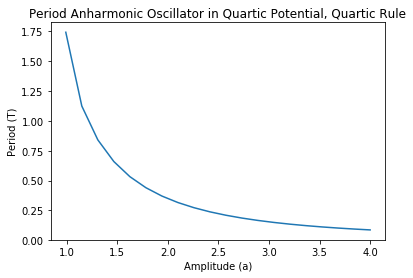

In [3]:
####In class problem
import numpy as np
from myint import *
from matplotlib import pyplot as plt

a = np.linspace(.99,4,20)
#a = np.array([1,2,3,4]) #array from 1 to 4

f0 = np.vectorize(lambda x: 2./np.sqrt(2*(a**4-x**4)))

b = quarticrule(f0,0,0.98,20)

fig, ax = plt.subplots()
ax.plot(a,b)
ax.set_title('Period Anharmonic Oscillator in Quartic Potential, Quartic Rule')
ax.set_xlabel('Amplitude (a)')
ax.set_ylabel('Period (T)')
plt.show()

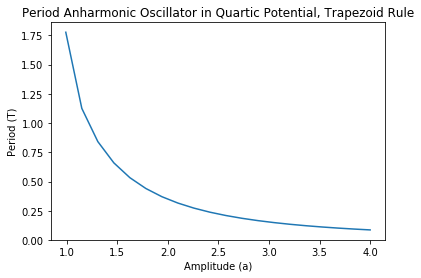

In [4]:
d = trapezoidrule(f0,0,0.98,20)
fig, dx = plt.subplots()
dx.plot(a,d)
dx.set_title('Period Anharmonic Oscillator in Quartic Potential, Trapezoid Rule')
dx.set_xlabel('Amplitude (a)')
dx.set_ylabel('Period (T)')
plt.show()

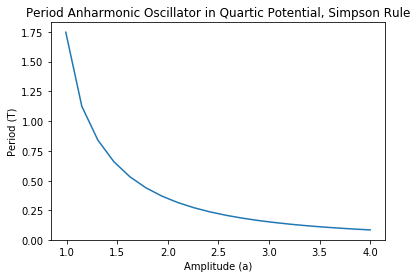

In [5]:
g = simpsonrule(f0,0,0.98,20)
fig, gx = plt.subplots()
gx.plot(a,g)
gx.set_title('Period Anharmonic Oscillator in Quartic Potential, Simpson Rule')
gx.set_xlabel('Amplitude (a)')
gx.set_ylabel('Period (T)')
plt.show()